In [113]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from itertools import product
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [118]:
def preprocess_monk(file_name):
    '''
    load and preprocess data from the monk dataset
    '''

    # load the dataset, split into input (X) and output (y) variables
    df = pd.read_csv(file_name, delimiter=' ', header=None, names=['remove_this_column','target', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'data_number'], index_col=False)
    df.drop(columns='remove_this_column')

    x1 = np.array(df['x1'])
    x2 = np.array(df['x2'])
    x3 = np.array(df['x3'])
    x4 = np.array(df['x4'])
    x5 = np.array(df['x5'])
    x6 = np.array(df['x6'])
    target = np.array(df['target'])

    encoder = OneHotEncoder(sparse_output=False)

    x1_ =x1.reshape(-1, 1)
    # Fit and transform the data to one-hot encoding
    input_one_hot = encoder.fit_transform(x1_)
    inputs = [x2,x3,x4,x5,x6]

    for x in inputs:
        data =x.reshape(-1, 1)
        # Fit and transform the data to one-hot encoding
        one_hot_encoded = encoder.fit_transform(data)

        # Display the result
        #print("Original data:")
        #print(data)

        #print("\nOne-hot encoded data:")
        #print(one_hot_encoded)

        input_one_hot = np.hstack((input_one_hot, one_hot_encoded))

    #print(input_one_hot.shape)
    #print(input_one_hot[0])
    #print(target[0])

    x = torch.tensor(input_one_hot, dtype=torch.float32)
    y = torch.tensor(target, dtype=torch.float32).reshape(-1,1)
    return x, y

In [119]:
x_train, y_train = preprocess_monk(file_name='monk_data/monks-1.train')
x_test, y_test = preprocess_monk(file_name='monk_data/monks-1.test')

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

torch.Size([124, 17])
torch.Size([124, 1])
torch.Size([432, 17])
torch.Size([432, 1])


Epoch [100/1000], Training Loss: 0.2388, Training Accuracy: 0.7177, Test Loss: 0.2400, Test Accuracy: 0.7037
Epoch [200/1000], Training Loss: 0.2104, Training Accuracy: 0.7742, Test Loss: 0.2191, Test Accuracy: 0.7407
Epoch [300/1000], Training Loss: 0.1628, Training Accuracy: 0.8548, Test Loss: 0.1911, Test Accuracy: 0.7431
Epoch [400/1000], Training Loss: 0.1361, Training Accuracy: 0.8548, Test Loss: 0.1820, Test Accuracy: 0.7546
Epoch [500/1000], Training Loss: 0.1257, Training Accuracy: 0.8710, Test Loss: 0.1799, Test Accuracy: 0.7500
Epoch [600/1000], Training Loss: 0.1208, Training Accuracy: 0.8710, Test Loss: 0.1792, Test Accuracy: 0.7569
Epoch [700/1000], Training Loss: 0.1179, Training Accuracy: 0.8710, Test Loss: 0.1785, Test Accuracy: 0.7569
Epoch [800/1000], Training Loss: 0.1156, Training Accuracy: 0.8790, Test Loss: 0.1776, Test Accuracy: 0.7662
Epoch [900/1000], Training Loss: 0.1136, Training Accuracy: 0.8790, Test Loss: 0.1763, Test Accuracy: 0.7731
Epoch [1000/1000], 

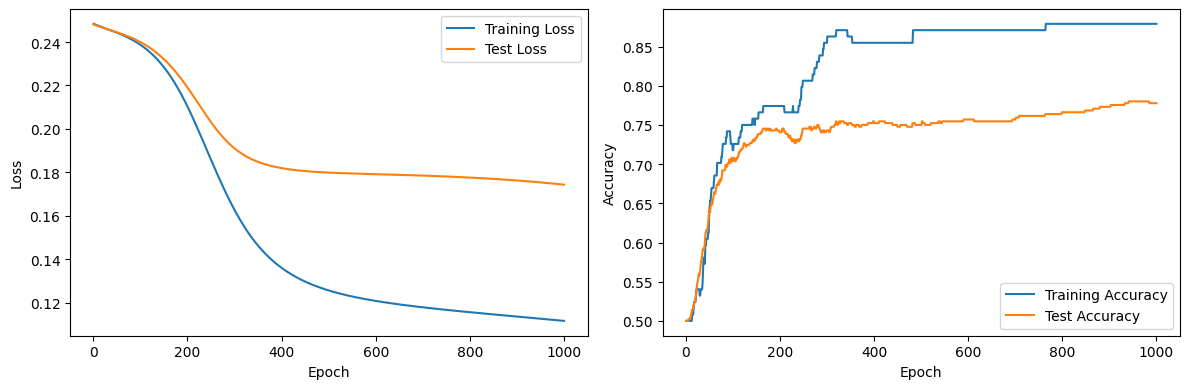

In [142]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the classifier
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.tanh(x)
        x = self.fc3(x)
        output = self.sigmoid(x)
        return output

# Set hyperparameters
input_size = 17
hidden_size = 5
output_size = 1
learning_rate = 0.1
num_epochs = 1000

# Create an instance of the model
model = SimpleClassifier(input_size, hidden_size, output_size)


# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Lists to store training and test losses for plotting
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    # Forward pass and training loss
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    predicted_labels = torch.round(outputs)
    correct_predictions = (predicted_labels == y_train).sum().item()
    total_samples = y_train.size(0)
    train_accuracy = correct_predictions / total_samples

    # Test loss and accuracy
    with torch.no_grad():
        test_outputs = model(x_test)
        test_loss = criterion(test_outputs, y_test)

        predicted_test_labels = torch.round(test_outputs)
        correct_test_predictions = (predicted_test_labels == y_test).sum().item()
        total_test_samples = y_test.size(0)
        test_accuracy = correct_test_predictions / total_test_samples

    # Save training and test losses and accuracies for plotting
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Print the loss and accuracy every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plot the training and test losses
plt.figure(figsize=(12, 4))

# Loss plots
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plots
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
